In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_excel('Dataset/data.xlsx')

## 1. Data Preliminary Analysis

### 1.1 Perform preliminary data inspection

In [3]:
print("Data Shape:", df.shape)
print("Data Info:")
df.info()

Data Shape: (233154, 41)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                   

In [4]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [5]:
# Filling missing values with new value - 'Unemployed'
df['Employment.Type'].fillna('Unemployed',inplace = True)

In [6]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: Employment.Type, dtype: int64

In [7]:
df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [8]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


No Duplicates in the dataset!

### 1.2 Change variable names

In [9]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [10]:
# Replacing all '.' with '_' for the column names
df.columns = df.columns.str.replace('.','_')

C:\Users\USER\AppData\Local\Temp\ipykernel_16812\3670713857.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.','_')


In [11]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [12]:
# Also changing all columns names to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [13]:
df.head()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


## 2. Performing EDA

### 2.1 Statistical description of quantitative variables

In [14]:
df.describe()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,...,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


### 2.2 Distribution of the target variable

In [15]:
df['loan_default'].unique()

array([0, 1], dtype=int64)

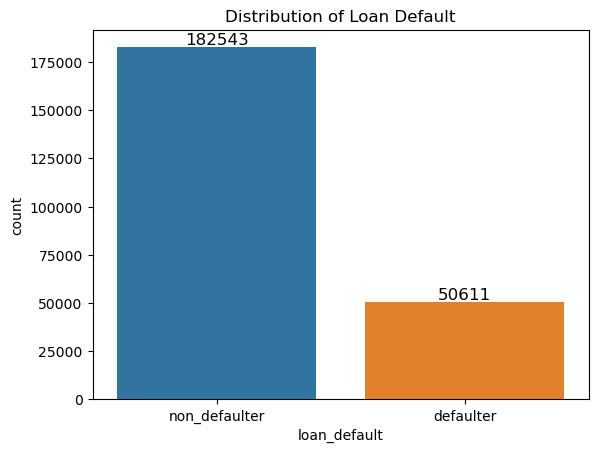

In [16]:
ax = sns.countplot(x='loan_default', data=df)
plt.title('Distribution of Loan Default')
plt.xticks(df['loan_default'].unique(), ['non_defaulter','defaulter'])

# Add the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.show()

### 2.3 Distribution of the target variable across various categories

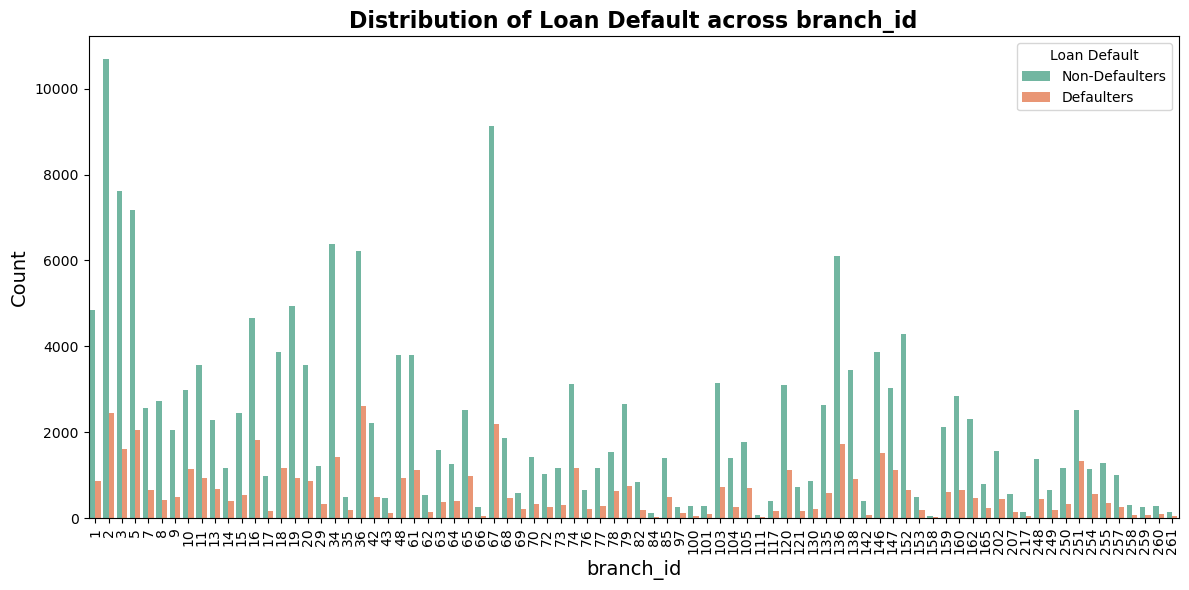

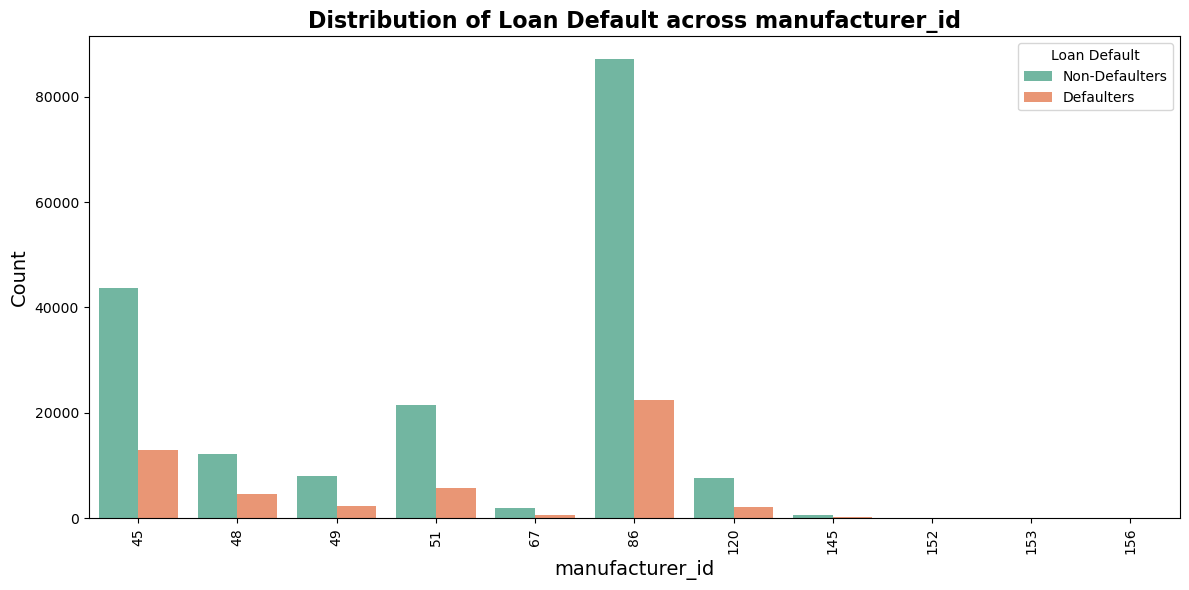

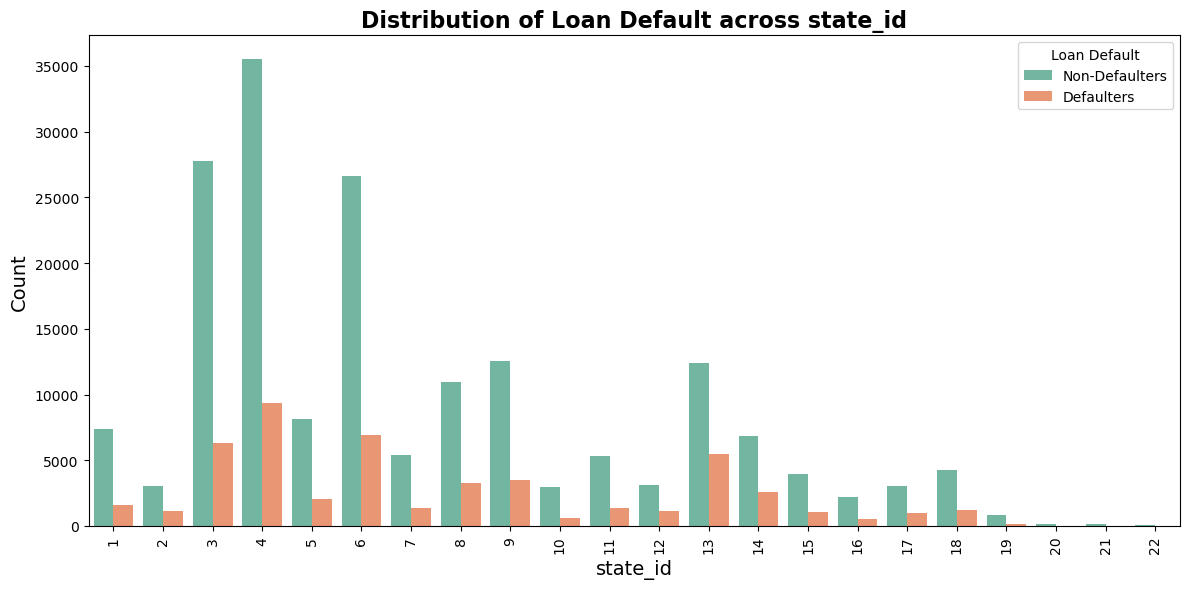

In [17]:
categories = ['branch_id', 'manufacturer_id', 'state_id']

for cat in categories:
    plt.figure(figsize=(12, 6))  # Adjust figure size to provide more space
    sns.countplot(x=cat, hue='loan_default', data=df, palette='Set2')
    plt.title(f'Distribution of Loan Default across {cat}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=90)  # Rotate labels to 90 degrees for better readability
    plt.xlabel(cat, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Loan Default', labels=['Non-Defaulters', 'Defaulters'], loc='upper right')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [18]:
# Supplier Id is having so many values to be listed in the x axis
df['supplier_id'].nunique()

2953

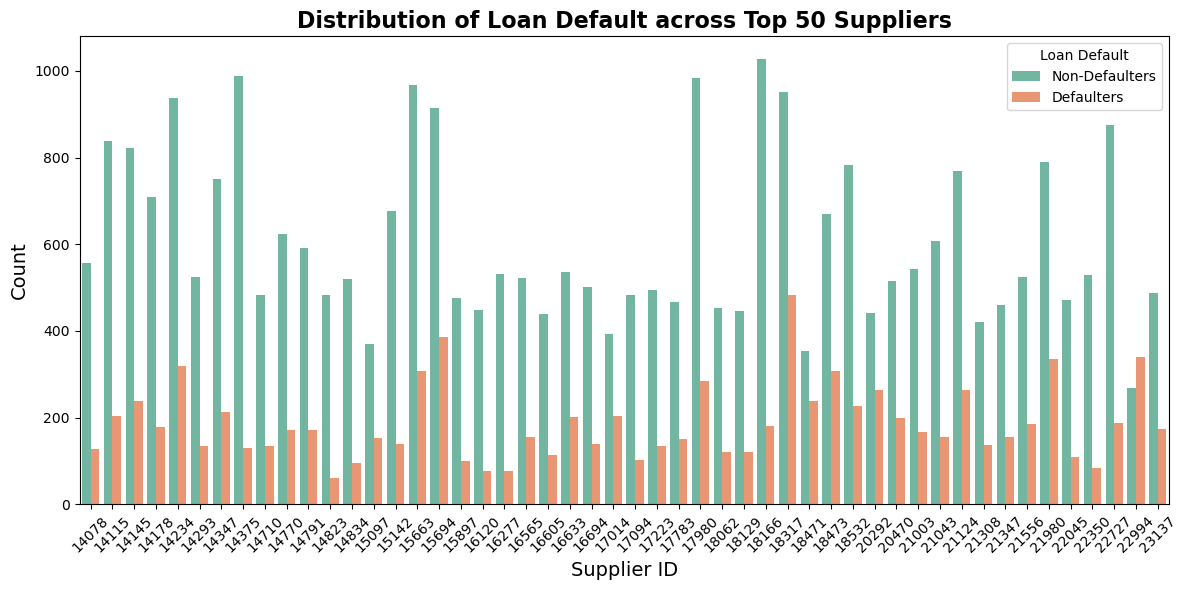

In [19]:
# Set the number of top suppliers to visualize
top_n = 50

# Identify the top N suppliers by frequency
top_suppliers = df['supplier_id'].value_counts().nlargest(top_n).index

# Filter the dataset to include only rows with the top N suppliers
filtered_df = df[df['supplier_id'].isin(top_suppliers)]

# Plot the distribution of loan default for the top N suppliers
plt.figure(figsize=(12, 6))
sns.countplot(x='supplier_id', hue='loan_default', data=filtered_df, palette='Set2')
plt.title(f'Distribution of Loan Default across Top {top_n} Suppliers', fontsize=16, fontweight='bold')
plt.xlabel('Supplier ID', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Loan Default', labels=['Non-Defaulters', 'Defaulters'], loc='upper right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### 2.4 Employment types and pie chart for defaulters and non-defaulters

In [20]:
df['employment_type'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: employment_type, dtype: int64

we have already removed the null values and replaced it with "Unemployed"

In [21]:
# Group by 'employment_type' and 'loan_default' and calculate sizes
employment_pie = df.groupby(['employment_type', 'loan_default']).size().unstack().fillna(0)
employment_pie

loan_default,0,1
employment_type,,
Salaried,77948,19910
Self employed,98578,29057
Unemployed,6017,1644


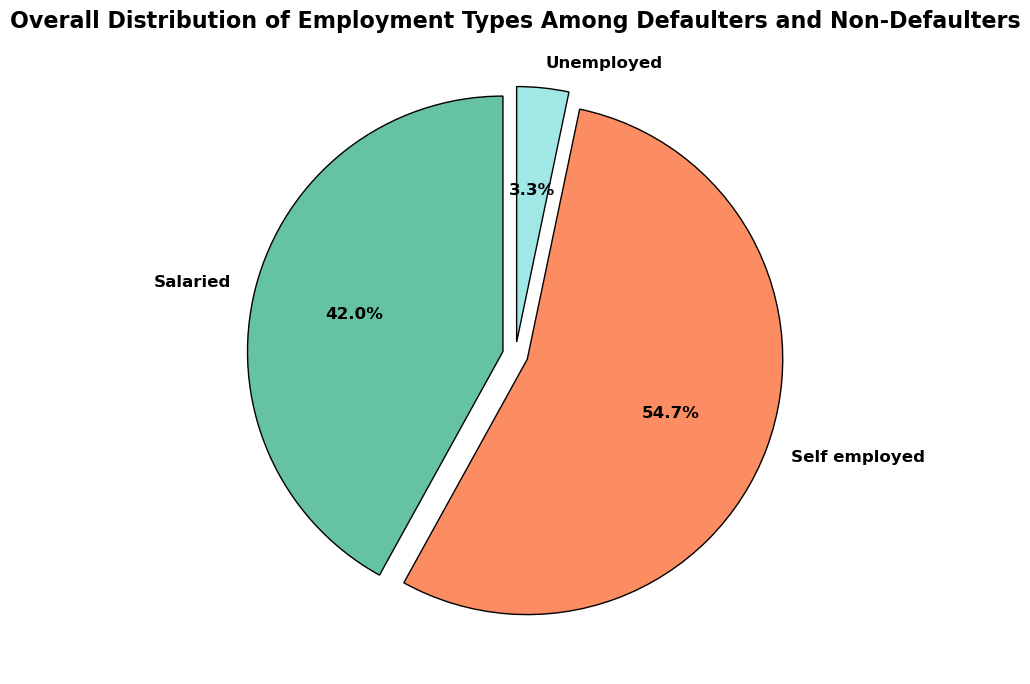

In [22]:
# Sum the defaulters and non-defaulters across employment types
employment_type_totals = employment_pie.sum(axis=1)

# Plot a pie chart for the overall distribution of defaulters and non-defaulters by employment type
plt.figure(figsize=(8, 8))
employment_type_totals.plot.pie(
    autopct='%.1f%%',
    colors=['#66c2a5', '#fc8d62', '#a0e7e5'],
    startangle=90,
    labels=employment_type_totals.index,
    explode=[0.05] * len(employment_type_totals.index),
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'weight': 'bold'}
)
plt.title('Overall Distribution of Employment Types Among Defaulters and Non-Defaulters', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.tight_layout()  # Ensure the layout is tight and well-organized
plt.show()

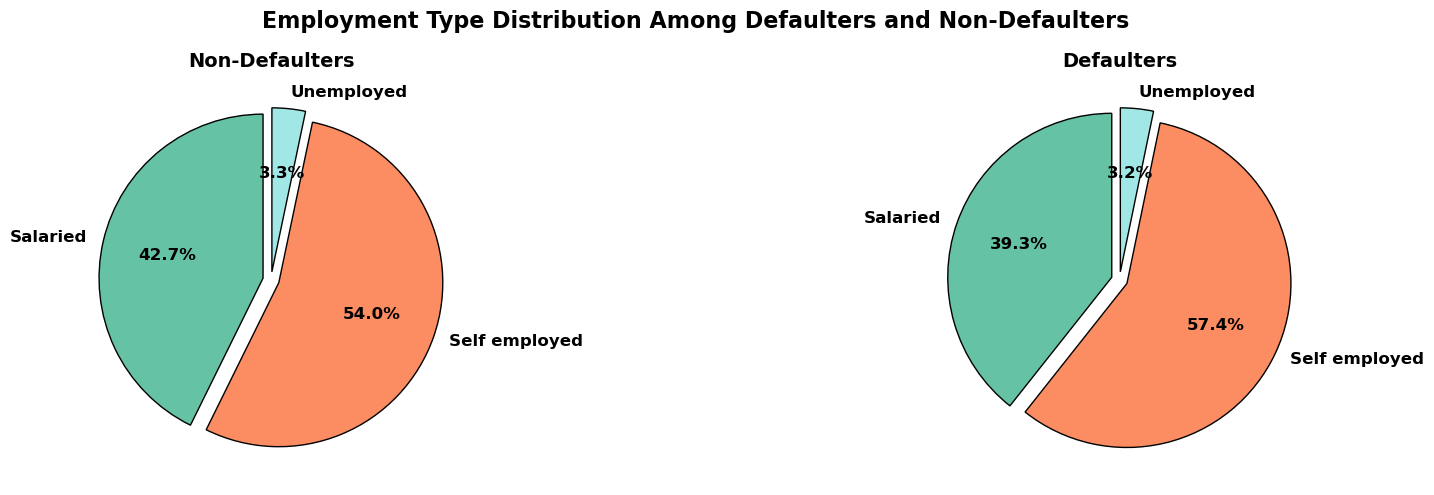

In [23]:
# Define colors for the pie charts
colors = ['#66c2a5', '#fc8d62', '#a0e7e5']

# Plot pie charts for defaulters and non-defaulters
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot for non-defaulters
employment_pie[0].plot.pie(
    ax=axes[0],
    autopct='%.1f%%',
    colors=colors,
    startangle=90,
    labels=employment_pie.index,
    explode=[0.05] * len(employment_pie.index),
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'weight': 'bold'}
)
axes[0].set_title('Non-Defaulters', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')  # Remove the y-label for a cleaner look

# Plot for defaulters
employment_pie[1].plot.pie(
    ax=axes[1],
    autopct='%.1f%%',
    colors=colors,
    startangle=90,
    labels=employment_pie.index,
    explode=[0.05] * len(employment_pie.index),
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'weight': 'bold'}
)
axes[1].set_title('Defaulters', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')  # Remove the y-label for a cleaner look

# Add a central title for the figure
plt.suptitle('Employment Type Distribution Among Defaulters and Non-Defaulters', fontsize=16, fontweight='bold')

# Ensure tight layout for the plots
plt.tight_layout()

# Adjust the space between the plots and the central title
plt.subplots_adjust(top=0.85)

# Display the pie charts
plt.show()

### 2.5 Age distribution with respect to defaulters

In [24]:
df['disbursaldate']

0        2018-08-03
1        2018-08-01
2        2018-09-26
3        2018-09-23
4        2018-10-08
            ...    
233149   2018-10-06
233150   2018-10-31
233151   2018-10-23
233152   2018-08-17
233153   2018-09-28
Name: disbursaldate, Length: 233154, dtype: datetime64[ns]

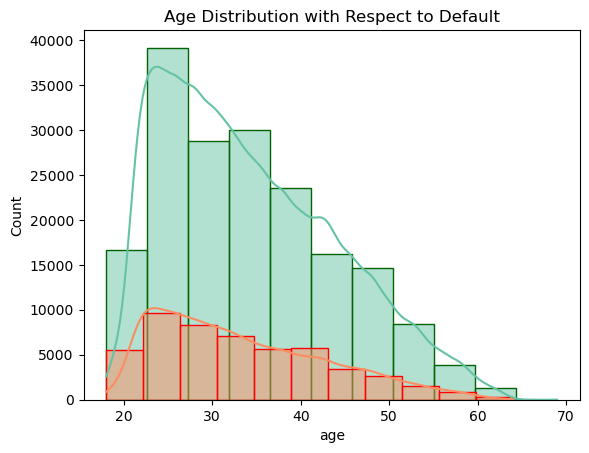

In [25]:
df['age'] = df['disbursaldate'].dt.year - df['date_of_birth'].dt.year
sns.histplot(x ='age',data = df[df['loan_default']==0] ,bins = 11,kde =True,color = '#66c2a5',
             label = 'NON-defaulter'.upper(),edgecolor = 'darkgreen')
sns.histplot(x ='age',data = df[df['loan_default']==1] ,bins = 11,kde =True,color = '#fc8d62',
             label = 'defaulter'.upper(),edgecolor = 'red')
plt.title('Age Distribution with Respect to Default')
plt.show()

### 2.6 What type of ID is presented by most of the customers as proofs?

In [26]:
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default', 'age'],
      dtype='object')

In [27]:
id_flags = ['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']
id_flags_summary = df[id_flags].sum()
print("Most common ID types presented:")
id_flags_count = pd.DataFrame({'ID': id_flags_summary.index,'CNT':id_flags_summary.values})
id_flags_count

Most common ID types presented:


,ID,CNT
0,aadhar_flag,195924
1,pan_flag,17621
2,voterid_flag,33794
3,driving_flag,5419
4,passport_flag,496


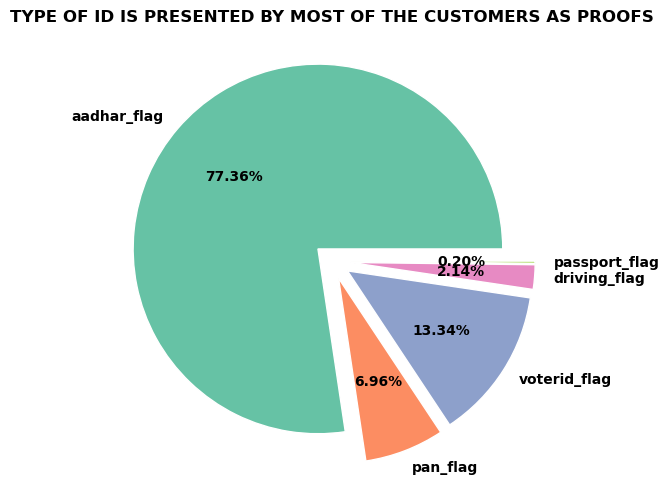

In [28]:
plt.figure(figsize =(8,6))
plt.pie(x = 'CNT',data = id_flags_count,
        autopct = "%1.2f%%",
        shadow = False, 
        explode = [0.1]*len(id_flags_count['ID'].values),
        colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'],
       labels = id_flags_count['ID'].values,
       startangle = 0,
       textprops = {'fontweight':'bold'},
       wedgeprops = {'linewidth':1,
                    'edgecolor':'w'})

plt.title("type of ID is presented by most of the customers as proofs".upper(),weight = 'bold')
plt.show()

## 3. Performing EDA and Modeling

### 3.1 Study the credit bureau score distribution

In [29]:
df['perform_cns_score_description'].unique()

array(['No Bureau History Available', 'A-Very Low Risk',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk',
       'E-Low Risk', 'F-Low Risk', 'G-Low Risk', 'H-Medium Risk',
       'I-Medium Risk', 'J-High Risk', 'K-High Risk', 'L-Very High Risk',
       'M-Very High Risk',
       'Not Scored: No Updates available in last 36 months',
       'Not Scored: Not Enough Info available on the customer',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [30]:
df['perform_cns_score'].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: perform_cns_score, dtype: float64

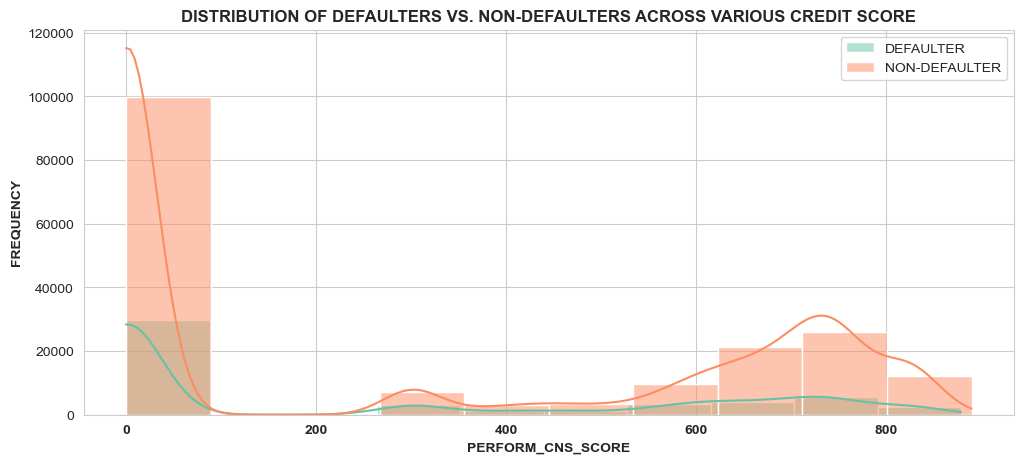

In [31]:
plt.figure(figsize = (12,5))
sns.set_style('whitegrid')


sns.histplot(x ='perform_cns_score',data = df[df['loan_default']==1],bins = 10,color = '#66c2a5',kde = True,label = 'DEFAULTER')
sns.histplot(x ='perform_cns_score',data = df[df['loan_default']==0],bins = 10,color = '#fc8d62',kde = True,label = 'NON-DEFAULTER')


plt.xlabel('perform_cns_score'.upper(),weight = 'bold')
plt.ylabel('frequency'.upper(),weight='bold')
plt.xticks(weight ='bold')
plt.xticks(weight ='bold')
plt.title('distribution of defaulters vs. non-defaulters across various credit score'.upper(),weight = 'bold')
plt.legend(loc = 'best')


plt.show()

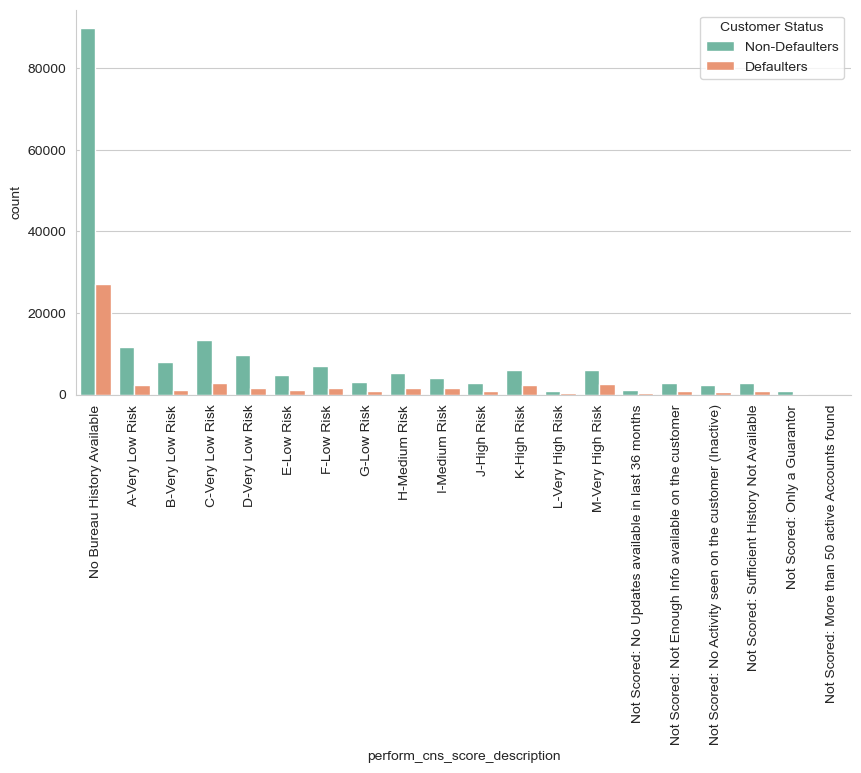

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['perform_cns_score_description'],hue = 'loan_default',data = df,palette = 'Set2')

# Update legend labels
plt.legend(title='Customer Status', labels=['Non-Defaulters', 'Defaulters'])
plt.xticks(rotation = 90)
sns.despine()
plt.show()

### 3.2 Primary and secondary account details

In [33]:
df[['pri_no_of_accts', 'sec_no_of_accts', 'loan_default']].groupby('loan_default').describe()

pri_no_of_accts                                                 \
                       count      mean       std  min  25%  50%  75%    max   
loan_default                                                                  
0                   182543.0  2.538038  5.261142  0.0  0.0  1.0  3.0  354.0   
1                    50611.0  2.089328  5.040134  0.0  0.0  0.0  2.0  453.0   

             sec_no_of_accts                                                
                       count      mean       std  min  25%  50%  75%   max  
loan_default                                                                
0                   182543.0  0.061848  0.651657  0.0  0.0  0.0  0.0  52.0  
1                    50611.0  0.049100  0.527358  0.0  0.0  0.0  0.0  38.0

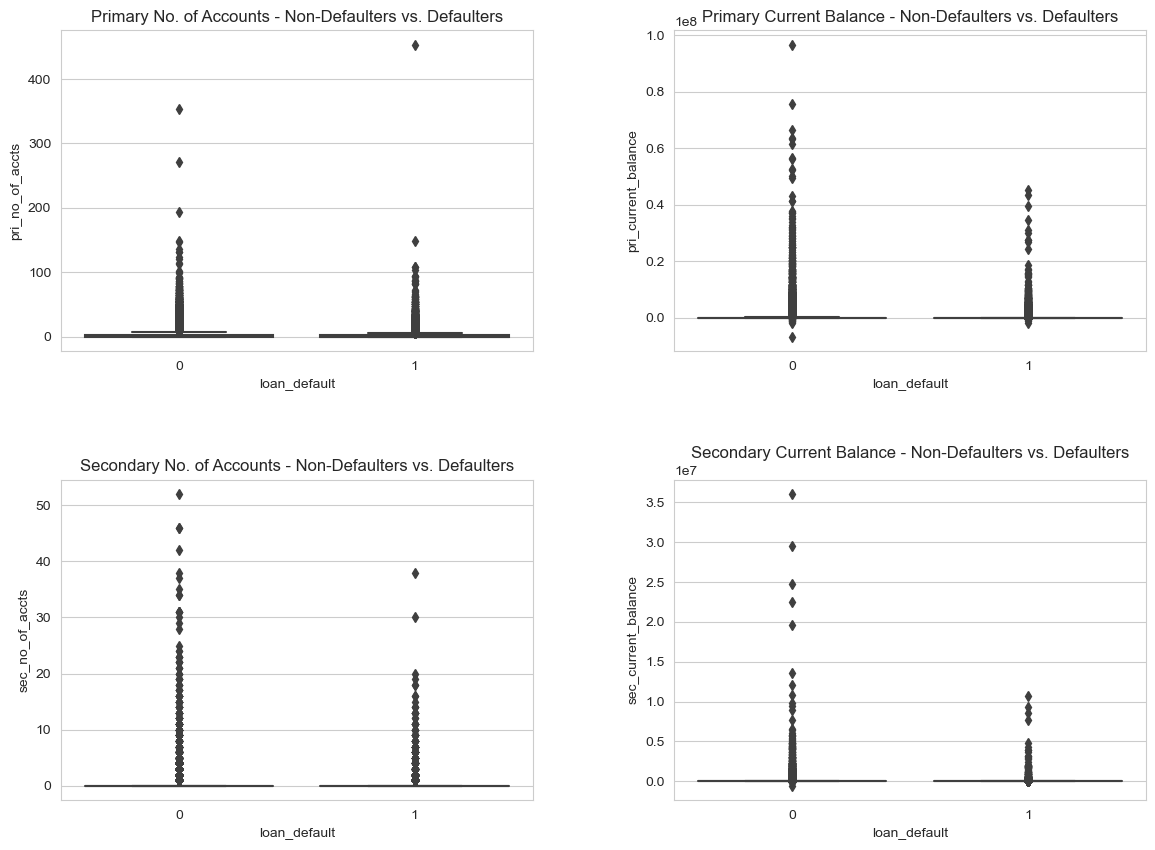

In [34]:
# Set figure size and layout for all box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust spacing between plots

# Box plot for Primary No. of Accounts
sns.boxplot(ax=axes[0, 0], x='loan_default', y='pri_no_of_accts', data=df)
axes[0, 0].set_title('Primary No. of Accounts - Non-Defaulters vs. Defaulters')

# Box plot for Primary Current Balance
sns.boxplot(ax=axes[0, 1], x='loan_default', y='pri_current_balance', data=df)
axes[0, 1].set_title('Primary Current Balance - Non-Defaulters vs. Defaulters')

# Box plot for Secondary No. of Accounts
sns.boxplot(ax=axes[1, 0], x='loan_default', y='sec_no_of_accts', data=df)
axes[1, 0].set_title('Secondary No. of Accounts - Non-Defaulters vs. Defaulters')

# Box plot for Secondary Current Balance
sns.boxplot(ax=axes[1, 1], x='loan_default', y='sec_current_balance', data=df)
axes[1, 1].set_title('Secondary Current Balance - Non-Defaulters vs. Defaulters')

# Display all plots
plt.show()

### Analysis Summary

**Primary Number of Accounts**: Defaulters typically maintain a higher number of primary accounts compared to non-defaulters.

**Primary Current Balance**: Defaulters generally exhibit a lower primary current balance than non-defaulters.

**Secondary Number of Accounts**: Reflecting the pattern observed in primary accounts, defaulters usually have a greater number of secondary accounts than non-defaulters.

**Secondary Current Balance**: Defaulters often hold a lower secondary current balance compared to non-defaulters.

**Conclusion**: The analysis indicates that defaulters are characterised by a higher number of accounts and a lower balance across both primary and secondary accounts compared to non-defaulters. These insights can be valuable for financial institutions in evaluating loan default risk. However, it is crucial to remember that correlation does not imply causation. These factors should be integrated into a comprehensive risk assessment strategy rather than being used in isolation.

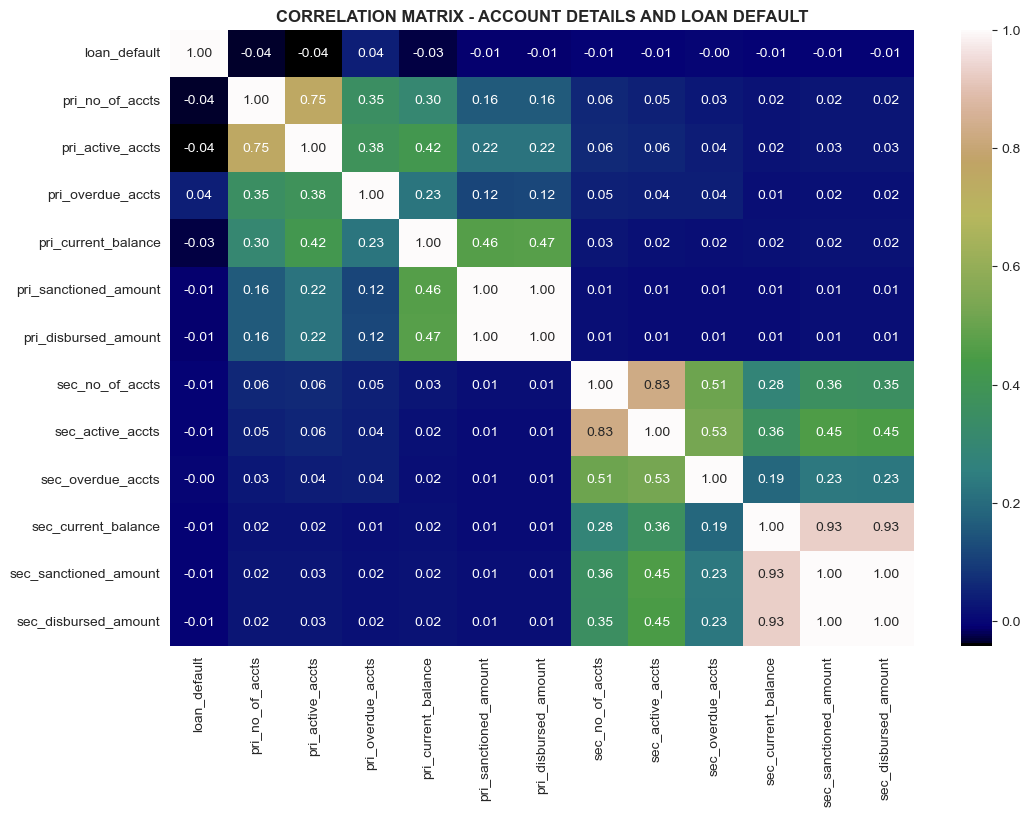

In [35]:
primary_cols = ['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount']
secondary_cols = ['sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount']

account_details = df[['loan_default'] + primary_cols + secondary_cols]
correlation_matrix = account_details.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='gist_earth', fmt='.2f')
plt.title('Correlation Matrix - Account Details and Loan Default'.upper(),weight = 'bold')
plt.show()

### Correlation Analysis Summary

**Primary Overdue Accounts (pri_overdue_accts)**: There is a small positive correlation between the number of primary overdue accounts and loan default. This indicates that customers with a higher number of primary overdue accounts are likely to default on their loans.

**Secondary Overdue Accounts (sec_overdue_accts)**: Secondary overdue accounts also exhibit a minute positive correlation with loan default, similar to primary overdue accounts. This suggests that customers with more secondary overdue accounts maybe prone to defaulting.

**Primary Number of Accounts (pri_no_of_accts), Primary Active Accounts (pri_active_accts), and Related Variables**: These variables demonstrate a weak negative correlation with loan default. This implies that as the values for these variables increase, the likelihood of loan default may slightly decrease. However, the correlations are weak, indicating that these variables are not strong predictors of loan default.

### 3.3 Difference between sanctioned and disbursed amount

In [36]:
pri_col = ['pri_sanctioned_amount','pri_disbursed_amount']
sec_col = ['sec_sanctioned_amount','sec_disbursed_amount']

In [37]:
# Calculate descriptive statistics for primary loans
primary_stats = df[['pri_sanctioned_amount', 'pri_disbursed_amount']].describe()
print('Primary Statistics\n', primary_stats)
# Calculate descriptive statistics for secondary loans
secondary_stats = df[['sec_sanctioned_amount', 'sec_disbursed_amount']].describe()
print('\nSecondary Statistics\n', secondary_stats)

Primary Statistics
        pri_sanctioned_amount  pri_disbursed_amount
count           2.331540e+05          2.331540e+05
mean            2.185039e+05          2.180659e+05
std             2.374794e+06          2.377744e+06
min             0.000000e+00          0.000000e+00
25%             0.000000e+00          0.000000e+00
50%             0.000000e+00          0.000000e+00
75%             6.250000e+04          6.080000e+04
max             1.000000e+09          1.000000e+09

Secondary Statistics
        sec_sanctioned_amount  sec_disbursed_amount
count           2.331540e+05          2.331540e+05
mean            7.295923e+03          7.179998e+03
std             1.831560e+05          1.825925e+05
min             0.000000e+00          0.000000e+00
25%             0.000000e+00          0.000000e+00
50%             0.000000e+00          0.000000e+00
75%             0.000000e+00          0.000000e+00
max             3.000000e+07          3.000000e+07


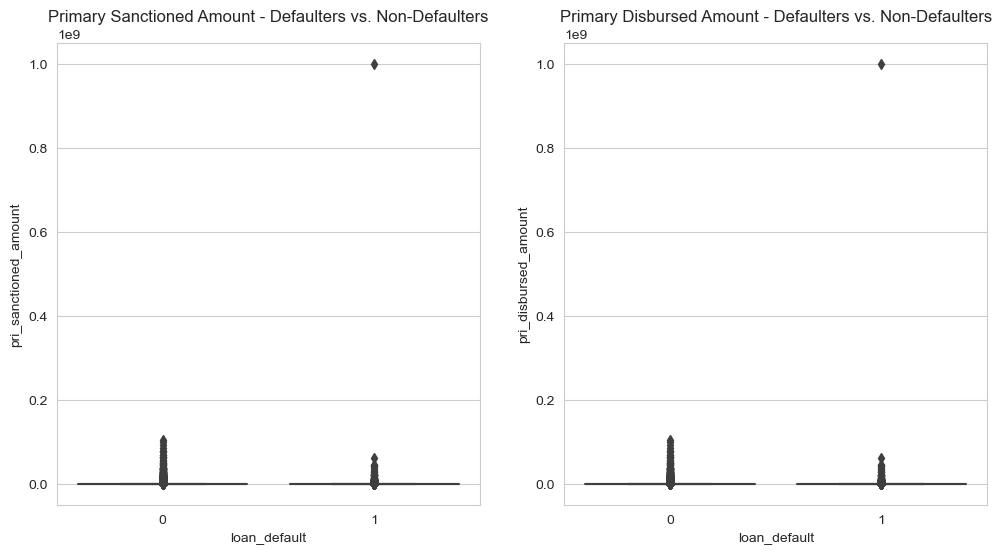

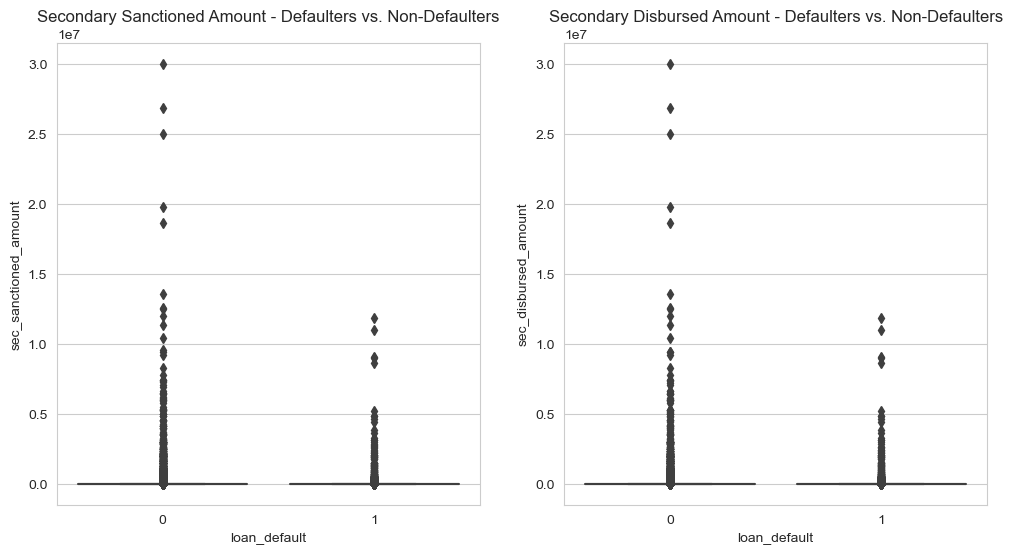

In [38]:
# Box plots for primary loan amounts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='pri_sanctioned_amount', x='loan_default')
plt.title('Primary Sanctioned Amount - Defaulters vs. Non-Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='pri_disbursed_amount', x='loan_default')
plt.title('Primary Disbursed Amount - Defaulters vs. Non-Defaulters')

# Box plots for secondary loan amounts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='sec_sanctioned_amount', x='loan_default')
plt.title('Secondary Sanctioned Amount - Defaulters vs. Non-Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='sec_disbursed_amount', x='loan_default')
plt.title('Secondary Disbursed Amount - Defaulters vs. Non-Defaulters')

plt.show()

### 3.4 Inquiry counts and risk

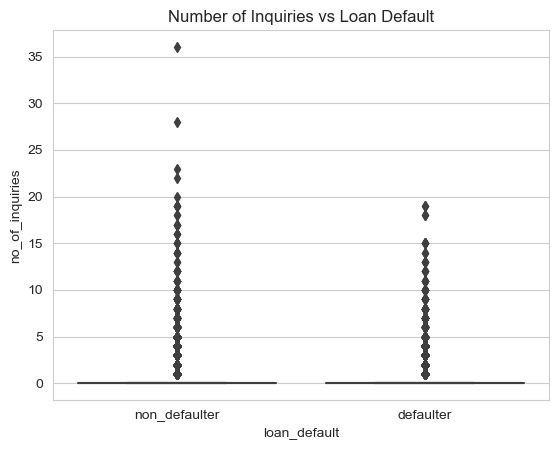

In [39]:
sns.boxplot(x='loan_default', y='no_of_inquiries', data=df)
plt.xticks(df['loan_default'].unique(), ['non_defaulter','defaulter'])
plt.title('Number of Inquiries vs Loan Default')
plt.show()


In [40]:
corr = df[['loan_default','no_of_inquiries']].corr(method = 'pearson')
corr

,loan_default,no_of_inquiries
loan_default,1.000000,0.043678
no_of_inquiries,0.043678,1.000000


There is not much significant relation with no_of_inquiries and loan default

### 3.5 Credit history factors

In [41]:
df2 = df.copy()

df2[['average_acct_age', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'credit_history_length']]

,average_acct_age,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,credit_history_length
0,0yrs 0mon,0,0,0yrs 0mon
1,0yrs 0mon,0,0,0yrs 0mon
2,0yrs 0mon,0,0,0yrs 0mon
3,0yrs 0mon,0,0,0yrs 0mon
4,0yrs 0mon,0,0,0yrs 0mon
...,...,...,...,...
233149,2yrs 4mon,0,0,2yrs 4mon
233150,1yrs 5mon,0,0,1yrs 5mon
233151,0yrs 9mon,35,5,3yrs 10mon
233152,1yrs 2mon,9,1,3yrs 2mon


#### Converting average_acct_age and credit_history_length to months format

In [42]:
df2[['average_acct_age','credit_history_length']].isnull().sum()

average_acct_age         0
credit_history_length    0
dtype: int64

In [43]:
combined_cols = ['average_acct_age','credit_history_length']

for col in combined_cols:
    df2[col] = df2[col].str.replace('[yrsmon]','',regex = True)
    df2[col]= df2[col].str.replace(' ',',',regex = True)
    df2[col] = df2[col].apply(lambda x : int(x.split(',')[0])*12 + int(x.split(',')[1]))
    print(col, 'is: \n',df2[col].unique())

average_acct_age is: 
 [  0  60  21  23   8  12  13  18  69   3  56   4   2  11  35  27  96  42
  97  15  37  39  40   9  10  25  33  22  49   6 140  24   7 105 121  74
  26  95 131   5  43  32  20  62  92  17  31 175 128  19  41  78 114 132
  38  45  61  44  86  16  52  63  75 103  14  55   1  99  29  65  48 122
 150  46  72 142 161  89 101  71  30  67  70  34  28  57 119  54  36 102
 117  88  68  84 113 185  64  90 162 167  98 126  50 115 214 123 147  85
  80  59  77 129 134  81 168 145 135 139  53 107 120 130 148 133 118  82
 199  58  51 157  87  93 188 110 164 106  79  66 143  47  83 112  76  73
  94 138 111 125 100 124 159 137 109  91 127 116 104 141 108 151 160 155
 136 176 149 154 180 163 191 183 292 166 158 156 184 144 169 171 195 203
 146 153 270 170 192 197 174 369 227 179 173 182]
credit_history_length is: 
 [  0  60  21  50  10  12  13  34  69   3  56   4   2  11  35  27  22  96
 145  15  37  39  40   9  25  33  32  49   6  24 140 134  41 121  74  23
  95   8  16 131   5  4

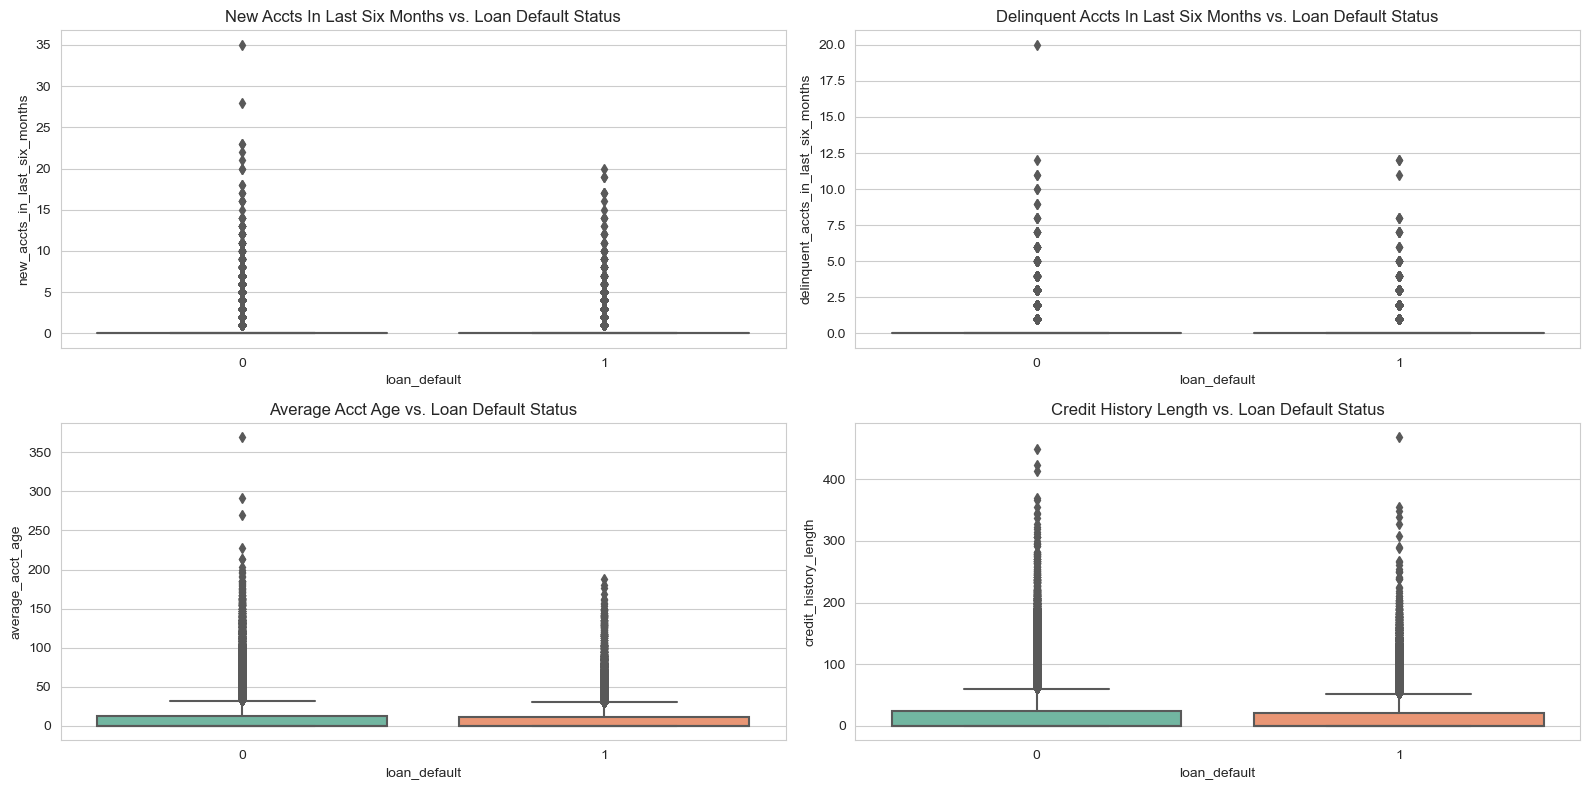

In [44]:
plt.figure(figsize=(16, 8))

credit_metrics = ['new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age', 'credit_history_length']

for i, col in enumerate(credit_metrics):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='loan_default', y=col, data=df2, palette='Set2')
    plt.title(f'{col.replace("_", " ").title()} vs. Loan Default Status')

# Show all plots
plt.tight_layout()
plt.show()

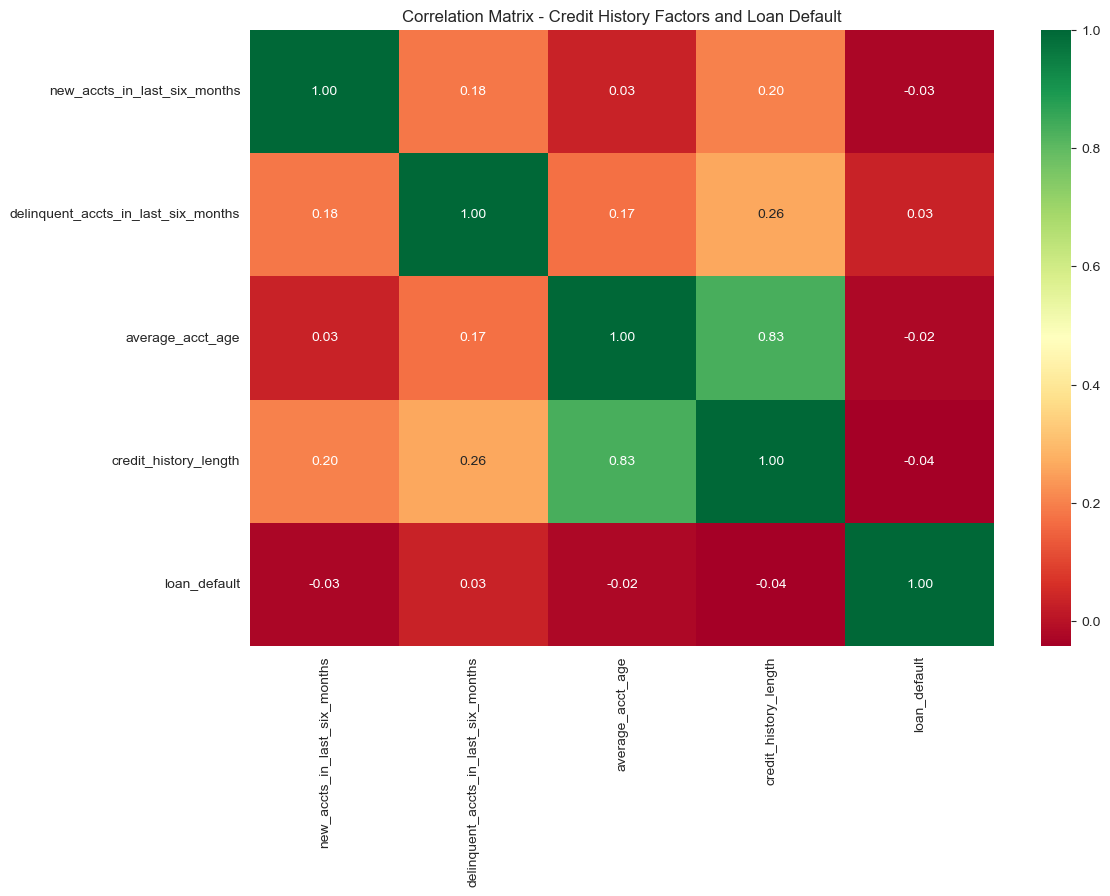

In [45]:
credit_metrics.append('loan_default')

plt.figure(figsize=(12, 8))
sns.heatmap(df2[credit_metrics].corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Matrix - Credit History Factors and Loan Default')
plt.show()

### 3.6 Logistic Regression Model

In [46]:
df2.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default', 'age'],
      dtype='object')

In [47]:
# Prepare data for modeling
# Drop non-numeric columns that are not needed for modeling
df_model = df2.drop(['uniqueid', 'loan_default', 'date_of_birth', 'disbursaldate'], axis=1)
df_model = pd.get_dummies(df_model)  # Convert categorical variables to dummy variables
df_model

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,mobileno_avl_flag,...,perform_cns_score_description_K-High Risk,perform_cns_score_description_L-Very High Risk,perform_cns_score_description_M-Very High Risk,perform_cns_score_description_No Bureau History Available,perform_cns_score_description_Not Scored: More than 50 active Accounts found,perform_cns_score_description_Not Scored: No Activity seen on the customer (Inactive),perform_cns_score_description_Not Scored: No Updates available in last 36 months,perform_cns_score_description_Not Scored: Not Enough Info available on the customer,perform_cns_score_description_Not Scored: Only a Guarantor,perform_cns_score_description_Not Scored: Sufficient History Not Available
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,...,0,0,0,1,0,0,0,0,0,0
1,53278,61360,89.63,67,22807,45,1497,6,1998,1,...,0,0,0,1,0,0,0,0,0,0
2,52378,60300,88.39,67,22807,45,1495,6,1998,1,...,0,0,0,1,0,0,0,0,0,0
3,46349,61500,76.42,67,22807,45,1502,6,1998,1,...,0,0,0,1,0,0,0,0,0,0
4,43594,78256,57.50,67,22744,86,1499,6,1998,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,3326,9,2229,1,...,0,0,0,0,0,0,0,0,1,0
233150,55009,71200,78.72,138,17408,51,3385,9,2690,1,...,0,0,0,0,0,0,0,0,1,0
233151,58513,68000,88.24,135,23313,45,1797,4,90,1,...,0,0,0,0,1,0,0,0,0,0
233152,22824,40458,61.79,160,16212,48,96,16,1299,1,...,0,0,0,0,1,0,0,0,0,0


In [48]:
X = df_model
y = df2['loan_default']
print('X shape: ',X.shape)
print('y shape: ',y.shape)

X shape:  (233154, 59)
y shape:  (233154,)


In [49]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


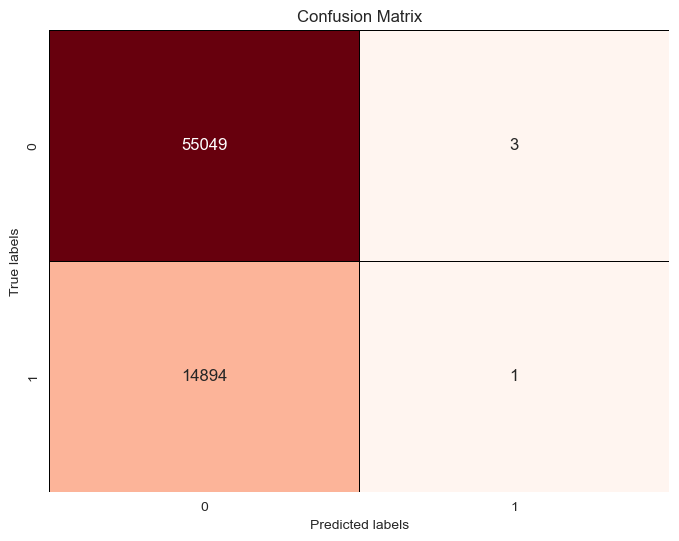

In [50]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False, 
            annot_kws={"size": 12}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Summary of Confusion Matrix Analysis

The confusion matrix reveals that the model has a high number of true negatives (55,049), indicating effective identification of non-defaulters. However, it has a very low number of true positives (1), reflecting poor performance in detecting actual defaulters. The model shows minimal false positives (3), suggesting high reliability when it predicts a defaulter. Yet, the substantial number of false negatives (14,894) points to a significant issue with missing actual defaulters.

Overall, while the model avoids false positives effectively, its failure to identify most defaulters limits its practical utility. Refining the model to enhance its sensitivity to defaulters is essential for improving its performance in detecting loan defaults.

In [51]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     55052
           1       0.25      0.00      0.00     14895

    accuracy                           0.79     69947
   macro avg       0.52      0.50      0.44     69947
weighted avg       0.67      0.79      0.69     69947



### Summary of Classification Report

The classification report shows the following performance:

- **Class 0 (Non-Defaulters)**: The model excels in identifying non-defaulters with a high recall of 1.00 and a precision of 0.79, resulting in an F1-score of 0.88. It effectively identifies all non-defaulters.

- **Class 1 (Defaulters)**: The model performs poorly in detecting defaulters, with a recall of 0.00 and a precision of 0.25, leading to an F1-score of 0.00. It fails to identify any actual defaulters.

- **Overall Accuracy**: The model achieves an accuracy of 79%, but this is largely due to its strong performance on non-defaulters.

- **Average Metrics**: The macro average metrics reflect moderate overall performance with low scores for defaulters, while the weighted averages show better performance but still highlight issues in defaulter detection.

In summary, the model is effective at predicting non-defaulters but significantly underperforms in identifying defaulters. Improvements are needed to enhance its sensitivity to defaulters.